<a href="https://colab.research.google.com/github/DirkStulgies/mlwtSportsPrediction/blob/main/Sports%20Versuch%20Alex%2060.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

In [2]:
### uploaded this one into my one of my public repositories, as this will be an outdated version of the spi dataset (this is just for coding practicing)
#df = pd.read_csv("https://raw.githubusercontent.com/lxndrshm/DBminutes/main/spi_matches.csv")

import requests as rq
from io import BytesIO

url = "https://raw.githubusercontent.com/lxndrshm/DBminutes/main/spi_matches.csv"
data = rq.get(url).content
df = pd.read_csv(BytesIO(data))
#df = df.drop(df.columns[[0]], axis=1)
dataset = df.copy()
dataset.tail()

,season,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,proj_score1,proj_score2,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
54404,2021,2022-05-29,1871,Spanish Segunda Division,Tenerife,FC Cartagena,33.14,30.08,0.4570,0.2483,0.2947,1.39,0.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54405,2021,2022-05-29,1871,Spanish Segunda Division,Sporting Gijón,Las Palmas,28.61,34.88,0.3490,0.3389,0.3122,1.13,1.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54406,2021,2022-05-29,1871,Spanish Segunda Division,Real Sociedad II,Real Zaragoza,26.98,31.08,0.3580,0.3221,0.3199,1.11,1.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54407,2021,2022-05-29,1871,Spanish Segunda Division,Mirandes,Fuenlabrada,29.65,23.93,0.4631,0.2407,0.2962,1.39,0.92,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54408,2021,2022-05-29,1871,Spanish Segunda Division,Real Oviedo,UD Ibiza,34.47,27.39,0.4816,0.2108,0.3077,1.33,0.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
### dropping all the coloums we dont need. We can also drop more coloums like importance
#df = df.drop(["xg1","xg2","nsxg1", "nsxg2","adj_score1", "adj_score2","spi1", "spi2", "proj_score1", "proj_score2"], axis = 1)
df = df.drop(["adj_score1", "adj_score2","proj_score1", "proj_score2", "season", "date", "league_id", "league", "team1", "team2"], axis = 1)
#creating a back-up copy 
copydf = df
### drop NA´s (keep in mind, that this drops all unplayed games for now, e.g the games we wanna predict in the future)
df = df.dropna()

In [4]:
### Create a new result coloumn
# create a list of our conditions
conditions = [
    (df['score1'] > df["score2"]),
    (df['score1'] < df["score2"]),
    (df['score1'] == df["score2"])
    ]
# create a list of the values we want to assign for each condition
values = ['1', '2', '0']

# create a new column and use np.select to assign values to it using our lists as arguments
df['result'] = np.select(conditions, values)

# display updated DataFrame
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,spi1,spi2,prob1,prob2,probtie,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,result
10,51.16,85.68,0.0463,0.8380,0.1157,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,2
11,68.85,56.48,0.5714,0.1669,0.2617,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,0
12,53.57,66.81,0.3459,0.3621,0.2921,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,1
13,58.98,59.74,0.4482,0.2663,0.2854,36.5,29.1,0.0,1.0,1.24,1.84,1.71,1.56,2
14,56.32,60.35,0.4380,0.2692,0.2927,33.9,32.5,1.0,1.0,1.40,0.55,1.13,1.06,0


In [5]:
df["result"] = df['result'].astype(str).astype(int)
df.dtypes

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


spi1           float64
spi2           float64
prob1          float64
prob2          float64
probtie        float64
importance1    float64
importance2    float64
score1         float64
score2         float64
xg1            float64
xg2            float64
nsxg1          float64
nsxg2          float64
result           int64
dtype: object

In [6]:
### reduces our dataframe to Bundesliga, would be nice to include 2. Bundesliga aswell. I did not know how to inculde that aswell. Also League_id seems off somehow.
#df = df[df['league'] == 'German Bundesliga']
df = df.drop(["score1", "score2"], axis = 1)
df = df.drop(["prob1", "prob2","probtie", "xg1", "xg2", "nsxg1", "nsxg2"], axis = 1)

In [7]:
df['result'].value_counts()
y = df['result']

In [8]:
from sklearn import preprocessing
import pandas as pd
#df = preprocessing.normalize(df, axis=0)
#df = pd.DataFrame(df)
#df.head()

In [9]:
# normalize df by dividing everything by 100
print(df.dtypes)
print(df.head())


# print(max(df["spi1"])) #96.57
# print(min(df["spi1"])) #6.08

df["spi1"] = df["spi1"] * (1/100)

# print(max(df["spi2"])) #96.69
# print(min(df["spi2"])) #6.24

df["spi2"] = df["spi2"] * (1/100)

# print(max(df["importance1"])) #100.0
# print(min(df["importance1"])) #0.0

df["importance1"] = df["importance1"] * (1/100)

# print(max(df["importance2"])) #100.0
# print(min(df["importance2"])) #0.0

df["importance2"] = df["importance2"] * (1/100)

spi1           float64
spi2           float64
importance1    float64
importance2    float64
result           int64
dtype: object
     spi1   spi2  importance1  importance2  result
10  51.16  85.68         32.4         67.7       2
11  68.85  56.48         53.7         22.9       0
12  53.57  66.81         38.1         22.2       1
13  58.98  59.74         36.5         29.1       2
14  56.32  60.35         33.9         32.5       0


In [10]:
df.head()


,spi1,spi2,importance1,importance2,result
10,0.5116,0.8568,0.324,0.677,2
11,0.6885,0.5648,0.537,0.229,0
12,0.5357,0.6681,0.381,0.222,1
13,0.5898,0.5974,0.365,0.291,2
14,0.5632,0.6035,0.339,0.325,0


In [11]:
#X = df.drop(['11'], axis=1)
#y = df['result']
X = df = df.iloc[: , :-1]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [13]:
y_train.head()

47444    1
22276    2
25590    0
32306    1
49426    1
Name: result, dtype: int64

In [14]:
num_epochs = 25
print(len(X_train))

19602


In [15]:
model = Sequential()
model.add(Dense(units=6, activation='relu', input_dim=len(X_train.columns)))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(units=12, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(units=12, activation='relu'))
model.add(tf.keras.layers.Dropout(0.4))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

In [16]:

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-1,
    decay_steps=10000,
    decay_rate=0.1)


model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adadelta(
    # momentum=0.9,
    # nesterov=True, 
    learning_rate=lr_schedule
), metrics=['SparseCategoricalAccuracy'])

In [17]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs,  batch_size=1000)

Epoch 1/25
20/20 [==============================] - 2s 34ms/step - loss: 1.1006 - sparse_categorical_accuracy: 0.3721 - val_loss: 1.0974 - val_sparse_categorical_accuracy: 0.3573
Epoch 2/25
20/20 [==============================] - 0s 12ms/step - loss: 1.0985 - sparse_categorical_accuracy: 0.3937 - val_loss: 1.0956 - val_sparse_categorical_accuracy: 0.4077
Epoch 3/25
20/20 [==============================] - 0s 11ms/step - loss: 1.0970 - sparse_categorical_accuracy: 0.4113 - val_loss: 1.0938 - val_sparse_categorical_accuracy: 0.4362
Epoch 4/25
20/20 [==============================] - 0s 12ms/step - loss: 1.0949 - sparse_categorical_accuracy: 0.4209 - val_loss: 1.0921 - val_sparse_categorical_accuracy: 0.4509
Epoch 5/25
20/20 [==============================] - 0s 13ms/step - loss: 1.0929 - sparse_categorical_accuracy: 0.4277 - val_loss: 1.0903 - val_sparse_categorical_accuracy: 0.4485
Epoch 6/25
20/20 [==============================] - 0s 9ms/step - loss: 1.0912 - sparse_categorical_accur

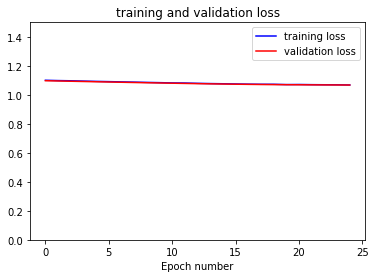

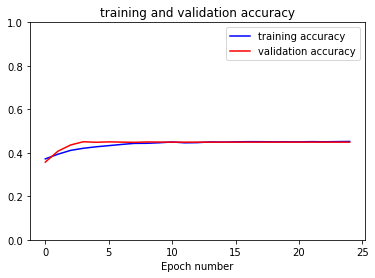

154/154 [==============================] - 1s 6ms/step - loss: 1.0677 - sparse_categorical_accuracy: 0.4491


final training loss: 1.067978
final training accuracy: 0.452250
final test loss: 1.067681
final test accuracy: 0.449092




In [18]:

# plot training and validation loss  
plt.plot(history.history['loss'], color = 'blue', label = 'training loss')
plt.plot(history.history['val_loss'], color = 'red', label = 'validation loss')
plt.xlabel('Epoch number')
plt.ylim(0, 1.5)
plt.title('training and validation loss')
plt.legend()
plt.show()

# plot training and validation accuracy 
# SparseCategoricalAccuracy
plt.plot(history.history['sparse_categorical_accuracy'], color = 'blue', label = 'training accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], color = 'red', label = 'validation accuracy')
plt.xlabel('Epoch number')
plt.ylim(0, 1)
plt.title('training and validation accuracy')
plt.legend()
plt.show()

# model evaluation
train_loss = history.history['loss'][num_epochs-1] 
train_acc = history.history['sparse_categorical_accuracy'][num_epochs-1]
#validation_loss = model.evaluate(validation_input, validation_target)[0]
#validation_acc = model.evaluate(validation_input, validation_target)[1]
test_loss = model.evaluate(X_test, y_test)[0]
test_acc = model.evaluate(X_test, y_test)[1]

print("\n")
print("final training loss: %f" % train_loss)
print("final training accuracy: %f" % train_acc)
# #print("final validation loss: %f" % validation_loss)
# #print("final validation accuracy: %f" % validation_acc)
print("final test loss: %f" % test_loss)
print("final test accuracy: %f" % test_acc)
print("\n")


# veränderungen:
------------------------------
normaliesed, alle werte zwischen 0,1 ursprungs bereich 0,100

Layer hinzugefügt und vergrößert

-------------------------
## Adadelta:

Epoch 50/50
613/613 [==============================] - 2s 4ms/step - loss: 1.0170 - accuracy: 0.5006

## Adam:

Epoch 50/50
613/613 [==============================] - 2s 4ms/step - loss: 1.0680 - accuracy: 0.4502

## Adamax: //fängt früh an zu overfitten

Epoch 50/50
613/613 [==============================] - 2s 4ms/step - loss: 0.9949 - accuracy: 0.5120

## SGD: //momentum & nesterov 0.9 //fängt auch relativ früh an zu "overfitten"

Epoch 50/50
613/613 [==============================] - 2s 4ms/step - loss: 0.9937 - accuracy: 0.5141

## Adagrad: //fängt auch vorher an zu overfitten

Epoch 50/50
613/613 [==============================] - 2s 4ms/step - loss: 0.9974 - accuracy: 0.5133


## FTRL //macht garnichts

Epoch 2/50
613/613 [==============================] - 3s 4ms/step - loss: 1.0675 - accuracy: 0.4512

Epoch 3/50
613/613 [==============================] - 3s 4ms/step - loss: 1.0675 - accuracy: 0.4512

Epoch 4/50
613/613 [==============================] - 3s 4ms/step - loss: 1.0674 - accuracy: 0.4512

Epoch 5/50
613/613 [==============================] - 3s 4ms/step - loss: 1.0675 - accuracy: 0.4512

Epoch 6/50
613/613 [==============================] - 3s 4ms/step - loss: 1.0674 - accuracy: 0.4512

## RMSprop // frühes overfitten

poch 19/50
613/613 [==============================] - 2s 4ms/step - loss: 1.0728 - accuracy: 0.4503









